In [1]:
import torch
from torch.autograd import Variable

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

In [ ]:
# import the iris dataset
iris = datasets.load_iris()
dataset = np.concatenate((iris.data, iris.target[np.newaxis, ...].T), axis=1)
np.random.shuffle(dataset)

# split in train and validation datasets
train_dataset = (dataset[0:100, :4], dataset[0:100, 4])
val_dataset = (dataset[100:, :4], dataset[100:, 4])

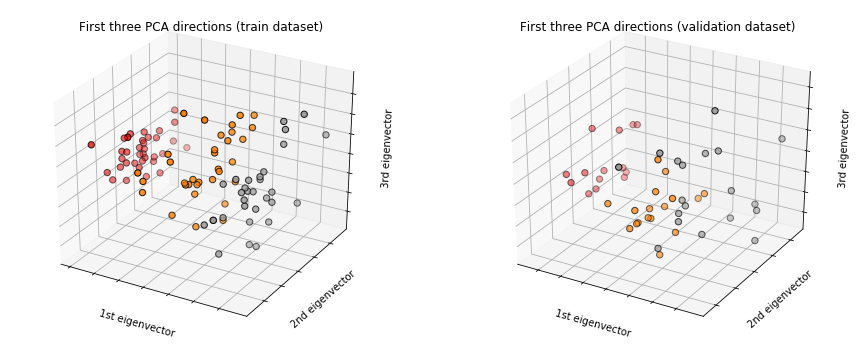

In [2]:
# plot PCA of train dataset
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
X_reduced = PCA(n_components=3).fit_transform(train_dataset[0])
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=train_dataset[1],
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions (train dataset)")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

# plot PCA of validation dataset
ax = fig.add_subplot(1, 2, 2, projection="3d")
X_reduced = PCA(n_components=3).fit_transform(val_dataset[0])
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=val_dataset[1],
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions (validation dataset)")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [9]:
num_epochs = 200
n_labels = np.unique(train_dataset[1]).shape[0]
features = Variable(torch.from_numpy(train_dataset[0]).float())
labels = Variable(torch.from_numpy(train_dataset[1]).long())

# linear encodes vector of 4 features to vector of 3 outputs
# linear = Ax + b, where A and b are parameters of the module
linear = torch.nn.Linear(features.size(1), n_labels)
criterion = torch.nn.CrossEntropyLoss()
# optimizer takes the parameters to tune as input and the learning rate
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

# training
for epoch in range(num_epochs):
    # clean gradients of parameters
    optimizer.zero_grad()

    # forward throught linear module (eq. Ax + b)
    outputs = linear(features)

    # eval loss with cross-entropy (softmax + negative log likelyhood)
    loss = criterion(outputs, labels)
    
    # eval gradients wrt each parameters
    loss.backward()

    # update parameters wrt to optimizer and gradients
    optimizer.step()
    
    # predicted is the index of the class with highest probability
    _, predicted = torch.max(outputs.data, 1)
    correct = (predicted == labels.data).sum()

    if epoch % 10 == 0:
        print ('Epoch: [{}/{}], Loss: {:.4f}, Acc: {}'.format(
            epoch+1, num_epochs, loss.data[0], (100 * correct / labels.size(0))))

Epoch: [1/200], Loss: 3.6107, Acc: 36.0
Epoch: [11/200], Loss: 0.7869, Acc: 69.0
Epoch: [21/200], Loss: 0.6696, Acc: 69.0
Epoch: [31/200], Loss: 0.6075, Acc: 69.0
Epoch: [41/200], Loss: 0.5637, Acc: 69.0
Epoch: [51/200], Loss: 0.5279, Acc: 69.0
Epoch: [61/200], Loss: 0.4963, Acc: 70.0
Epoch: [71/200], Loss: 0.4671, Acc: 70.0
Epoch: [81/200], Loss: 0.4392, Acc: 71.0
Epoch: [91/200], Loss: 0.4123, Acc: 76.0
Epoch: [101/200], Loss: 0.3862, Acc: 80.0
Epoch: [111/200], Loss: 0.3607, Acc: 84.0
Epoch: [121/200], Loss: 0.3362, Acc: 85.0
Epoch: [131/200], Loss: 0.3133, Acc: 91.0
Epoch: [141/200], Loss: 0.2930, Acc: 97.0
Epoch: [151/200], Loss: 0.2767, Acc: 97.0
Epoch: [161/200], Loss: 0.2648, Acc: 98.0
Epoch: [171/200], Loss: 0.2564, Acc: 98.0
Epoch: [181/200], Loss: 0.2494, Acc: 98.0
Epoch: [191/200], Loss: 0.2431, Acc: 98.0


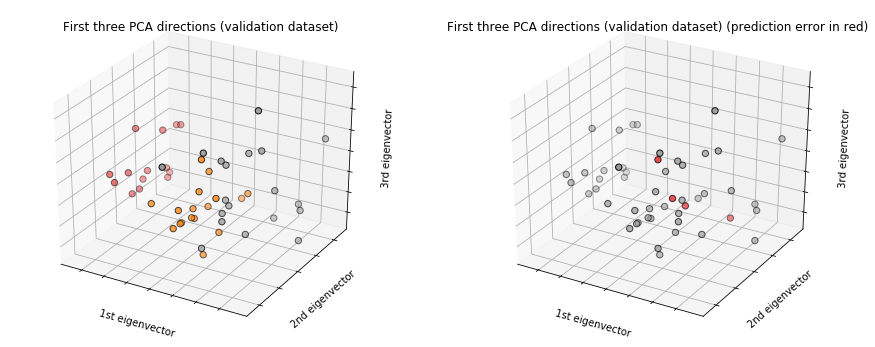

In [4]:
# inference on the validation dataset
features = Variable(torch.from_numpy(val_dataset[0]).float())
labels = Variable(torch.from_numpy(val_dataset[1]).long())
outputs = linear(features)
_, predicted = torch.max(outputs.data, 1)

# plot PCA of validation dataset
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
X_reduced = PCA(n_components=3).fit_transform(val_dataset[0])
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=val_dataset[1],
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions (validation dataset)")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

# plot PCA of validation dataset, showing prediction errors in red
ax = fig.add_subplot(1, 2, 2, projection="3d")
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=predicted.numpy()==val_dataset[1],
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions (validation dataset) (prediction error in red)")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()